In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as connector
import warnings
warnings.filterwarnings("ignore")


In [2]:
conn = connector.connect(
   host="localhost",      # or "127.0.0.1"
    user="root",           # your MySQL username
    password="1234",
    database="world"
)

In [3]:
query = """
SHOW TABLES
"""
df = pd.read_sql(query, conn)
df.head()

,Tables_in_world
0,city
1,country
2,countrylanguage


How many columns there are in table?

In [4]:
query = """SHOW COLUMNS FROM country"""

df = pd.read_sql(query, conn)
df

,Field,Type,Null,Key,Default,Extra
0,Code,char(3),NO,PRI,,
1,Name,char(52),NO,,,
2,Continent,"enum('Asia','Europe','North America','Africa',...",NO,,Asia,
3,Region,char(26),NO,,,
4,SurfaceArea,"decimal(10,2)",NO,,0.00,
5,IndepYear,smallint,YES,,None,
6,Population,int,NO,,0,
7,LifeExpectancy,"decimal(3,1)",YES,,None,
8,GNP,"decimal(10,2)",YES,,None,
9,GNPOld,"decimal(10,2)",YES,,None,


How many countries there are?

In [5]:
query = """SELECT COUNT(*) AS total_countries FROM country;
"""
df = pd.read_sql(query, conn)
df

,total_countries
0,239


How many countries there in continent?

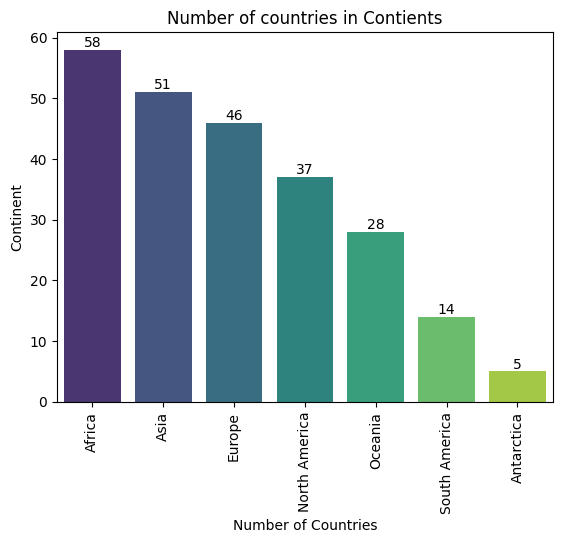

In [16]:
query = """SELECT Continent, COUNT(*) AS NumberOfCountries FROM country GROUP BY Continent ORDER BY NumberOfCountries DESC"""

df = pd.read_sql(query, conn)

ax=sns.barplot(
    y="NumberOfCountries", 
    x="Continent", 
    data=df, 
    palette="viridis",
    estimator=sum, ci=None
)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of countries in Contients")
plt.xlabel("Number of Countries")
plt.ylabel("Continent")
plt.xticks(rotation=90)
plt.show()


Which 10 countries have the highest population?

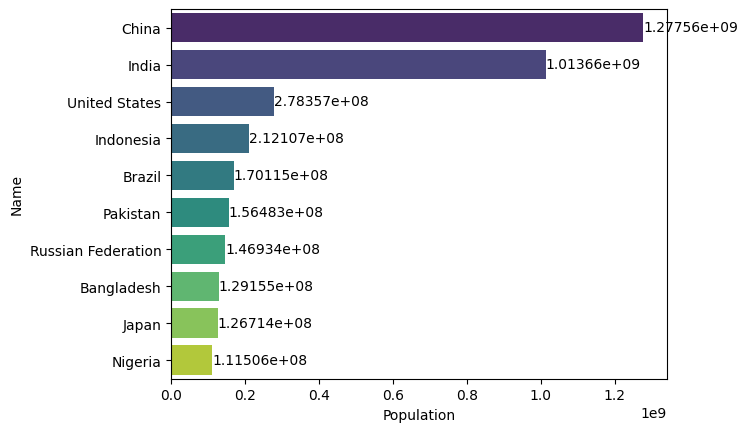

In [23]:
query = """SELECT *  FROM country ORDER BY Population DESC LIMIT 10;"""
df = pd.read_sql(query, conn)

ax = sns.barplot(
    y="Name",
    x="Population",
    palette='viridis',
    data=df,
)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


Which 10 countries have the lowest population?

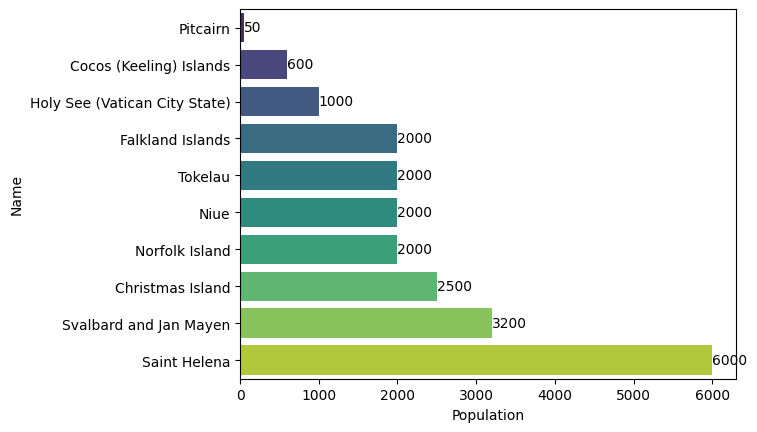

In [60]:
query = """SELECT *  FROM country WHERE Population > 0 ORDER BY Population  ASC LIMIT 10 ;"""
df = pd.read_sql(query, conn)

ax = sns.barplot(
    y="Name",
    x="Population",
    palette='viridis',
    data=df,
)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


What is the total population of each continent?

In [ ]:
query = """SELECT Continent, SUM(Population) AS TotalPopulation FROM country GROUP BY Continent ORDER BY TotalPopulation DESC;"""
df = pd.read_sql(query, conn)
df

,Continent,TotalPopulation
0,Asia,3.705026e+09
1,Africa,7.844750e+08
2,Europe,7.300746e+08
3,North America,4.829930e+08
4,South America,3.457800e+08
5,Oceania,3.040115e+07
6,Antarctica,0.000000e+00


What is the average life expectancy per continent?

In [32]:
query = """SELECT Continent, AVG(LifeExpectancy) FROM country GROUP BY Continent"""
df = pd.read_sql(query, conn)
df

,Continent,AVG(LifeExpectancy)
0,North America,72.99189
1,Asia,67.44118
2,Africa,52.57193
3,Europe,75.14773
4,South America,70.94615
5,Oceania,69.71500
6,Antarctica,NaN


Which 10 countries have the highest GNP?

In [38]:
query = """SELECT Name,GNP FROM COUNTRY ORDER BY GNP DESC LIMIT 10"""
df = pd.read_sql(query, conn)
df

,Name,GNP
0,United States,8510700.0
1,Japan,3787042.0
2,Germany,2133367.0
3,France,1424285.0
4,United Kingdom,1378330.0
5,Italy,1161755.0
6,China,982268.0
7,Brazil,776739.0
8,Canada,598862.0
9,Spain,553233.0


Which 10 countries have the highest GNP per capita?

In [41]:
query = """SELECT Name, GNP,Population, (GNP/Population) AS GNPPerCapita FROM country WHERE Population > 0 ORDER BY GNPPerCapita DESC LIMIT 10; """
df = pd.read_sql(query, conn)
df

,Name,GNP,Population,GNPPerCapita
0,Luxembourg,16321.0,435700,0.037459
1,Switzerland,264478.0,7160400,0.036936
2,Bermuda,2328.0,65000,0.035815
3,Brunei,11705.0,328000,0.035686
4,Liechtenstein,1119.0,32300,0.034644
5,Cayman Islands,1263.0,38000,0.033237
6,Denmark,174099.0,5330000,0.032664
7,Norway,145895.0,4478500,0.032577
8,United States,8510700.0,278357000,0.030575
9,Japan,3787042.0,126714000,0.029887


Find the average surface area of countries by continent.

In [45]:
query = """SELECT Continent, AVG(SurfaceArea) AS AvgSurfaceArea
FROM country
GROUP BY Continent
ORDER BY AvgSurfaceArea DESC;
"""

df = pd.read_sql(query, conn)
df

,Continent,AvgSurfaceArea
0,Antarctica,2.626420e+06
1,South America,1.276066e+06
2,North America,6.544451e+05
3,Asia,6.251177e+05
4,Africa,5.215582e+05
5,Europe,5.010681e+05
6,Oceania,3.058676e+05


Which continents have more than 20 countries?

In [52]:
query = """SELECT Continent, Count(Name) AS CountriesPerContinent FROM country GROUP BY Continent HAVING COUNT(Name) > 20"""
df = pd.read_sql(query, conn)
df

,Continent,CountriesPerContinent
0,North America,37
1,Asia,51
2,Africa,58
3,Europe,46
4,Oceania,28


In [55]:
query = """SELECT Continent, AVG(Population) AS AvgPopulationPerCountry
FROM country
GROUP BY Continent
ORDER BY AvgPopulationPerCountry DESC;"""

df = pd.read_sql(query, conn)
df


,Continent,AvgPopulationPerCountry
0,Asia,7.264756e+07
1,South America,2.469857e+07
2,Europe,1.587119e+07
3,Africa,1.352543e+07
4,North America,1.305386e+07
5,Oceania,1.085755e+06
6,Antarctica,0.000000e+00
